<a href="https://colab.research.google.com/github/rujuldwivedi/Projects/blob/main/NumPy_Models/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.binomial(n=1, p=0.4, size=100)

In [3]:
def likelihood(p, X):
    n = len(X)
    zeros = np.sum(X == 0)
    ones = n - zeros
    return p**ones * (1-p)**zeros

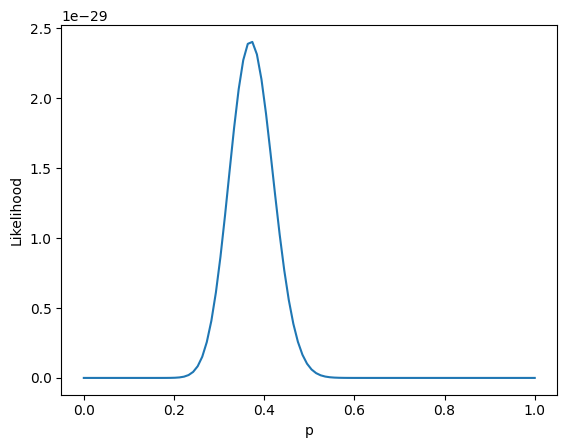

In [4]:
p = np.linspace(0, 1, 100)
plt.plot(p, likelihood(p, X))
plt.xlabel("p")
plt.ylabel("Likelihood")
plt.show()

In [5]:
def loss(p, X):
    return np.log(likelihood(p, X))

<ipython-input-5-72288cc79f14>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(likelihood(p, X))


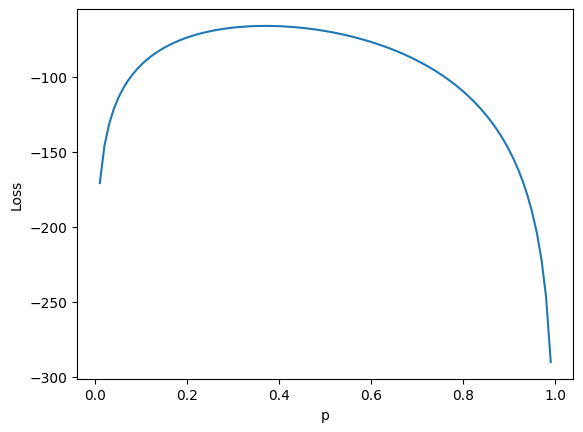

In [6]:
plt.plot(p, loss(p, X))
plt.xlabel("p")
plt.ylabel("Loss")
plt.show()

In [7]:
def p_hat(X):
    return np.sum(X) / len(X)

In [8]:
print("p_hat = ", p_hat(X))

p_hat =  0.37


In [9]:
p0 = 0.9
p1 = 0.1

In [10]:
h0_values = np.zeros_like(X)
h1_values = np.ones_like(X)

loss_h0 = loss(p0, h0_values)
loss_h1 = loss(p1, h1_values)

print("Loss for h0(X):", loss_h0)
print("Loss for h1(X):", loss_h1)

Loss for h0(X): -230.25850929940458
Loss for h1(X): -230.25850929940455


In [11]:
data = np.random.binomial(n=1,p=p1,size=100)

n = len(data)
ones = np.sum(data)

h0 = ones/n
h1 = 1-h0

In [12]:
def loss(arr1, arr2):
	ans = 0
	for i in range(len(arr1)):
		ans+=abs(arr1[i] - arr2[i])
	return ans

In [13]:
p_values = np.linspace(0,1,1000)
h_values = np.empty(len(p_values))

In [14]:
j=0
for i in p_values:
	h_arr = np.random.binomial(n=1, p=i, size=100)
	h_values[j] = loss(data, h_arr)
	j+=1

In [15]:
print(h0,h1)
print(p0*h1 + p1*h0)
print(h_values)

0.1 0.9
0.8200000000000001
[10. 10. 10. 11. 10. 10. 11. 10.  9.  9. 11. 11. 11. 12. 13. 12. 12.  8.
  9. 12. 11. 11. 15. 12. 10. 14. 12. 13. 12. 10. 10. 12. 15. 14. 12. 13.
 13. 15. 15. 13. 13. 13. 13. 11. 14. 15.  9. 16. 13. 12. 13. 17. 19. 15.
 13. 17. 16. 15. 13. 17. 14. 14. 20. 15. 11. 16. 14. 13. 14. 16. 16. 16.
 13. 15. 15. 17. 15. 13. 14. 19. 14. 13. 18. 14. 14. 13. 14. 17. 18. 19.
 18. 16. 19. 18. 16. 21. 18. 14. 16. 17. 17. 21. 16. 21. 19. 11. 18. 16.
 22. 19. 18. 23. 19. 16. 22. 14. 25. 23. 18. 17. 19. 21. 21. 21. 19. 22.
 23. 24. 26. 21. 20. 18. 26. 19. 21. 24. 24. 22. 25. 16. 25. 26. 25. 28.
 19. 26. 19. 19. 17. 20. 22. 25. 14. 22. 22. 21. 22. 20. 28. 27. 24. 26.
 18. 22. 22. 26. 16. 22. 27. 26. 19. 16. 23. 26. 24. 21. 20. 19. 35. 22.
 21. 25. 24. 21. 29. 33. 31. 24. 26. 23. 33. 28. 23. 22. 24. 20. 24. 31.
 21. 27. 31. 24. 26. 25. 31. 30. 35. 30. 25. 28. 27. 30. 28. 29. 35. 28.
 22. 28. 29. 26. 33. 33. 29. 26. 34. 28. 25. 34. 20. 26. 22. 30. 34. 32.
 26. 28. 32. 25. 25. 28.

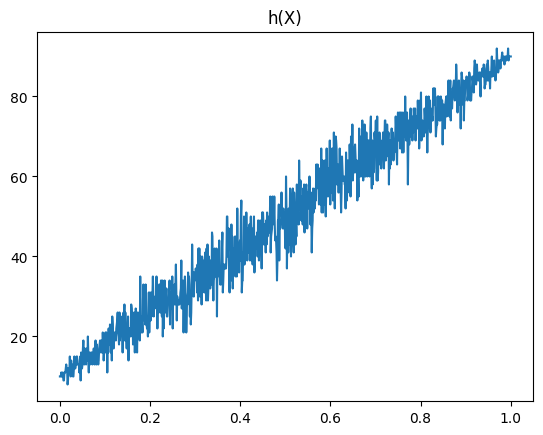

In [16]:
plt.title("h(X)")
plt.plot(p_values,h_values)
plt.show()

In [17]:
f0 = 0.4
f1 = 0.6

In [18]:
falsePositive = (f1 * p0)/(f1 * p0 + f0 * p1)
falseNegative = (f0 * p1)/(f1 * p0 + f0 * p1)
risk = falsePositive * f0 + falseNegative * f1

In [19]:
print("False Positive or Type I Loss:", falsePositive)
print("False Negative or Type II Loss:", falseNegative)
print("Risk factor R(hB):", risk)

False Positive or Type I Loss: 0.9310344827586207
False Negative or Type II Loss: 0.06896551724137931
Risk factor R(hB): 0.4137931034482759


In [20]:
np.random.seed(123)
f0_samples = np.random.normal(-1, 1, 1000)
f1_samples = np.random.normal(1, 1, 1000)

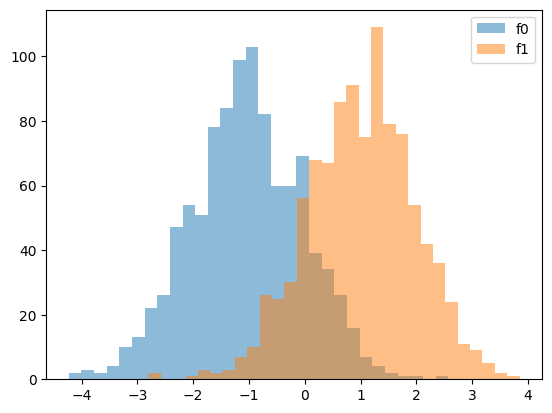

In [21]:
plt.hist(f0_samples, bins=30, alpha=0.5, label='f0')
plt.hist(f1_samples, bins=30, alpha=0.5, label='f1')
plt.legend(loc='upper right')
plt.show()

In [22]:
f0_pdf = 1 / (np.sqrt(2 * np.pi * 1)) * np.exp(-(p - (-1))**2 / (2 * 1))
f1_pdf = 1 / (np.sqrt(2 * np.pi * 1)) * np.exp(-(p - 1)**2 / (2 * 1))

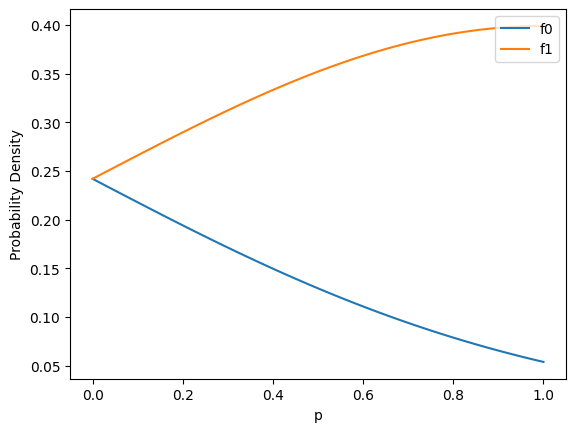

In [23]:
plt.plot(p, f0_pdf, label='f0')
plt.plot(p, f1_pdf, label='f1')
plt.xlabel("p")
plt.ylabel("Probability Density")
plt.legend(loc='upper right')
plt.show()

In [24]:
falsePositive_normal = np.sum(f1_pdf * p0) / (np.sum(f1_pdf * p0) + np.sum(f0_pdf * p1))
falseNegative_normal = np.sum(f0_pdf * p1) / (np.sum(f1_pdf * p0) + np.sum(f0_pdf * p1))
risk_normal = falsePositive_normal * p0 + falseNegative_normal * p1

In [25]:
print("False Positive or Type I Loss:", falsePositive_normal)
print("False Negative or Type II Loss:", falseNegative_normal)
print("Risk factor R(hB):", risk_normal)


False Positive or Type I Loss: 0.9575741772670384
False Negative or Type II Loss: 0.04242582273296147
Risk factor R(hB): 0.8660593418136306
